In [ ]:
import ssl

# Set the path to the CA certificates bundle
ssl._create_default_https_context = ssl._create_unverified_context

In [ ]:
import nltk

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
from nltk.tokenize import word_tokenize, TreebankWordTokenizer
import string

# set plot style
sns.set_theme()



In [ ]:
from nltk.corpus import stopwords

In [ ]:
mbti = pd.read_csv('https://raw.githubusercontent.com/Explore-AI/Public-Data/master/Data/classification_sprint/mbti_train.csv')
mbti.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [ ]:
# Separate each post in the 'posts' column into its own row
all_mbti = []
for i, row in mbti.iterrows():
    for post in row['posts'].split('|||'):
        all_mbti.append([row['type'], post])
all_mbti = pd.DataFrame(all_mbti, columns=['type', 'post'])

all_mbti



,type,post
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw
1,INFJ,http://41.media.tumblr.com/tumblr_lfouy03PMA1q...
2,INFJ,enfp and intj moments https://www.youtube.com...
3,INFJ,What has been the most life-changing experienc...
4,INFJ,http://www.youtube.com/watch?v=vXZeYwwRDw8 h...
...,...,...
316543,INFP,"Kallinhausin, you may have just rooted out the..."
316544,INFP,"In regards to the king, (in the show, not in t..."
316545,INFP,Sunlight bouncing off the fog at dawn. Serend...
316546,INFP,Songs are really powerful.


In [ ]:
#Remove noise
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r'url-web'
all_mbti['post'] = all_mbti['post'].replace(to_replace = pattern_url, value = subs_url, regex = True)
all_mbti['post'] = all_mbti['post'].str.lower()

#Remove puntuation
def remove_punctuation(post):
    return ''.join([l for l in post if l not in string.punctuation])

all_mbti['post'] = all_mbti['post'].apply(remove_punctuation)

# Tokenize the text using the TreebankWordTokenizer
tokeniser = TreebankWordTokenizer()
all_mbti['tokens'] = all_mbti['post'].apply(tokeniser.tokenize)

**Text feature extraction**

In [ ]:
def bag_of_words_count(words, word_dict={}):
    """ this function takes in a list of words and returns a dictionary
        with each word as a key, and the value represents the number of
        times that word appeared"""
    for word in words:
        if word in word_dict.keys():
            word_dict[word] += 1
        else:
            word_dict[word] = 1
    return word_dict



In [ ]:
#Create a list of all the MBTI personality types that are present in the original dataset
type_labels = list(all_mbti.type.unique())

In [ ]:
personality = {}
for pp in type_labels:
    df = all_mbti.groupby('type')
    personality[pp] = {}
    for row in df.get_group(pp)['tokens']:
        personality[pp] = bag_of_words_count(row, personality[pp])

In [ ]:
all_words = set()
for pp in type_labels:
    for word in personality[pp]:
        all_words.add(word)

In [ ]:
# create a combined bag of words dictionary for all the words in the text.

personality['all'] = {}
for pp in type_labels:
    for word in all_words:
        if word in personality[pp].keys():
            if word in personality['all']:
                personality['all'][word] += personality[pp][word]
            else:
                personality['all'][word] = personality[pp][word]

In [ ]:
# calculate how many words there are in total.
total_words = sum([v for v in personality['all'].values()])
total_words

8203466

Text(0.5, 0, 'word frequency')

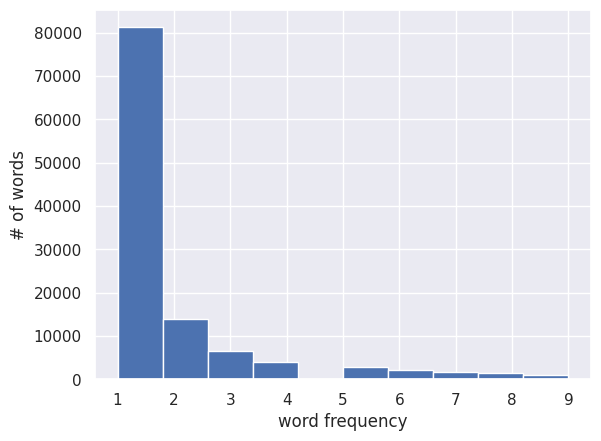

In [ ]:
#distribution of words which occur less than 10 times in the whole dataset.

_ = plt.hist([v for v in personality['all'].values() if v < 10],bins=10)
plt.ylabel("# of words")
plt.xlabel("word frequency")

In [ ]:
# only appear once
len([v for v in personality['all'].values() if v == 1])

81268

In [ ]:
# rare words that would appear once
rare_words = [k for k, v in personality['all'].items() if v==1]
print(rare_words[:100])



['hakkan', 'abruption', 'worshipper', 'advicepersonnally', 'aspegers', 'reinterpretation', 'fingering', 'dafne', 'miraclemiraculous', 'thousandth', 'bbuummmppp', 'btmangans', 'emoji187', 'furnishings', '80057', 'multitudinous', '447146', 'kitarosundance', 'surehow', 'unpersonal', '9710', 'shortor', 'skinnies', 'bender477', 'sunshinse', 'happyive', 'drudge', 'tyrosine', 'writteni', 'fleetingness', '343521', '12years', 'resin', '37100', 'wishes—every', 'doortouch', '5ive', 'dieticiannutritionist', 'glees', 'rappin', 'chouji', 'blushwave', '18x24', '91581', 'glassive', 'uderstanding', 'spatialunawareness', '1goo', 'nicelol', 'moonwatcher', 'darkness72', '447138', 'manylogue', 'redfaced', 'infecting', 'questioningly', 'hooooooly', 'lostathon', 'unemployeddoes', '132713', 'interpolation', 'tahoe', 'fsdjfhsdjfhdsj', 'dirie', '4w55w41w2', 'overabundanceexcept', 'sozial', 'sandpapery', 'hmone', 'herthat', 'actiontaking', 'threadomg', 'tonightlaughing', 'selfblame', '7w88w93w4', 'tallies', 'bur

In [ ]:
# some of these words don't make sense, but before we decide to remove them, let's see how much data we'll be left with.
# how many words appear more than 10 times?
# how many words of the total does that account for?
print(len([v for v in personality['all'].values() if v >= 10]))
occurs_more_than_10_times = sum([v for v in personality['all'].values() if v >= 10])
print(occurs_more_than_10_times)


18193
7998579


In [ ]:
occurs_more_than_10_times/total_words

0.9750243372740254

Using words that appear more than 10 times seems much more useful! And this accounts for 97% of all the words

In [ ]:
#let's remove all words that occur less than 10 times.

max_count = 10
remaining_word_index = [k for k, v in personality['all'].items() if v > max_count]




**Hypothesis testing**

Remember our Hypothesis from earlier?:

    Introverts tend to use the word I more than extroverts
    Conversely, Extroverts tend to favour the word you

Let's see if we finally have what we need to test it out. We'll first create one big dataframe with the word counts by personality profile (this may take a while).


In [ ]:
hm = []
for p, p_bow in personality.items():
    df_bow = pd.DataFrame([(k, v) for k, v in p_bow.items() if k in remaining_word_index], columns=['Word', p])
    df_bow.set_index('Word', inplace=True)
    hm.append(df_bow)

# create one big dataframe
df_bow = pd.concat(hm, axis=1)
df_bow.fillna(0, inplace=True)

In [ ]:
# top 10 words which appear most often
df_bow.sort_values(by='all', ascending=False).head(10)



,INFJ,ENTP,INTP,INTJ,ENTJ,ENFJ,INFP,ENFP,ISFP,ISTP,ISFJ,ISTJ,ESTP,ESFP,ESTJ,ESFJ,all
Word,,,,,,,,,,,,,,,,,
i,67821.0,27381.0,52046.0,43810.0,8875.0,8683.0,87642.0,31156.0,11148.0,13883.0,8037.0,8169.0,3704.0,1696.0,1856.0,2166.0,378073
the,39658.0,18993.0,35864.0,30497.0,6132.0,5018.0,48004.0,16454.0,6131.0,8893.0,4111.0,5141.0,2191.0,937.0,1000.0,1200.0,230224
to,40231.0,17852.0,33005.0,28753.0,5889.0,5471.0,48996.0,16945.0,6264.0,8725.0,4607.0,5106.0,2254.0,972.0,1078.0,1223.0,227371
a,31931.0,14728.0,26692.0,22778.0,4748.0,3966.0,40375.0,13846.0,4825.0,7124.0,3333.0,4033.0,1868.0,796.0,841.0,986.0,182870
and,31628.0,14236.0,24880.0,21568.0,4564.0,4343.0,40709.0,15002.0,5153.0,6540.0,3571.0,3827.0,1905.0,834.0,943.0,988.0,180691
of,24312.0,11335.0,21372.0,17857.0,3499.0,3114.0,29576.0,10217.0,3580.0,4962.0,2475.0,2976.0,1300.0,557.0,650.0,779.0,138561
you,22207.0,10870.0,17186.0,15997.0,3815.0,3048.0,24954.0,10315.0,3331.0,4696.0,2185.0,2731.0,1396.0,651.0,651.0,639.0,124672
that,19444.0,8947.0,16384.0,14432.0,2906.0,2611.0,23437.0,8583.0,2931.0,4054.0,2033.0,2207.0,1063.0,550.0,521.0,615.0,110718
it,18357.0,8257.0,15685.0,13167.0,2601.0,2278.0,22511.0,8010.0,2909.0,4244.0,2046.0,2285.0,1065.0,434.0,469.0,490.0,104808


In [ ]:
# extract the introvert types only from all the personality types.

intro_types_i = [p for p in type_labels if p[0] == 'I']



In [ ]:
#create an introvert total word count column, which sums the counts of all introvert columns.

df_bow['I'] = df_bow[intro_types_i].sum(axis=1)



In [ ]:
# calculate and add percentage columns.
for col in ['I', 'all']:
    df_bow[col+'_perc'] = df_bow[col] / df_bow[col].sum()



In [ ]:


# Print off the DataFrame to view what we've done.

df_bow.sort_values(by='all', ascending=False).head(5)



,INFJ,ENTP,INTP,INTJ,ENTJ,ENFJ,INFP,ENFP,ISFP,ISTP,ISFJ,ISTJ,ESTP,ESFP,ESTJ,ESFJ,all,I,I_perc,all_perc
Word,,,,,,,,,,,,,,,,,,,,
i,67821.0,27381.0,52046.0,43810.0,8875.0,8683.0,87642.0,31156.0,11148.0,13883.0,8037.0,8169.0,3704.0,1696.0,1856.0,2166.0,378073,292556.0,0.047701,0.047328
the,39658.0,18993.0,35864.0,30497.0,6132.0,5018.0,48004.0,16454.0,6131.0,8893.0,4111.0,5141.0,2191.0,937.0,1000.0,1200.0,230224,178299.0,0.029071,0.028820
to,40231.0,17852.0,33005.0,28753.0,5889.0,5471.0,48996.0,16945.0,6264.0,8725.0,4607.0,5106.0,2254.0,972.0,1078.0,1223.0,227371,175687.0,0.028646,0.028463
a,31931.0,14728.0,26692.0,22778.0,4748.0,3966.0,40375.0,13846.0,4825.0,7124.0,3333.0,4033.0,1868.0,796.0,841.0,986.0,182870,141091.0,0.023005,0.022892
and,31628.0,14236.0,24880.0,21568.0,4564.0,4343.0,40709.0,15002.0,5153.0,6540.0,3571.0,3827.0,1905.0,834.0,943.0,988.0,180691,137876.0,0.022481,0.022619


In [ ]:
# calculate chi2
df_bow['chi2_i'] = np.power((df_bow['I_perc'] - df_bow['all_perc']), 2) / df_bow['all_perc']

In [ ]:
df_bow[['I_perc', 'all_perc', 'chi2_i']][df_bow['I_perc'] > df_bow['all_perc']].sort_values(by='chi2_i', ascending=False).head(10)

,I_perc,all_perc,chi2_i
Word,,,
urlweb,0.002817,0.002615,0.000016
infp,0.001249,0.001118,0.000015
infj,0.001111,0.001019,0.000008
infps,0.000466,0.000413,0.000007
infjs,0.000393,0.000347,0.000006
intp,0.000936,0.000871,0.000005
my,0.012057,0.011859,0.000003
intps,0.000346,0.000315,0.000003
i,0.047701,0.047328,0.000003


Looking at the top words with higher chi-square values, we can see that words like "urlweb", "infp", "infj", as well as "i" have the top chi-square values compared to others. This indicates that these words are used more frequently by introverts than would be expected based on their overall occurrence in the dataset.

The word "I" appears 9th in the top 10 highest chi-square values of 0.000003, suggesting that its usage by introverts deviates significantly from what would be expected based on its general frequency.

Therefore, based on these findings, we can conclude that introverts tend to use "I" more frequently than extroverts, supporting the hypothesis that introverts favour the use of the word "I".

In [ ]:
# Let's now have a look at the words most used by extroverts, following the same process but for extrovert types.

#extract extrovert types only from all the personality types
intro_types_e = [p for p in type_labels if p[0] == 'E']
#Create an extrovert total word count column, which sums the counts of all extrovert columns
df_bow['E'] = df_bow[intro_types_e].sum(axis=1)
#calculate and add a percentage column for extroverts
df_bow['E_perc'] = df_bow['E'] / df_bow['E'].sum()
# calculate chi2 for extroverts
df_bow['chi2_e'] = np.power((df_bow['E_perc'] - df_bow['all_perc']), 2) / df_bow['all_perc']
df_bow[['E_perc', 'all_perc', 'chi2_e']][df_bow['E_perc'] > df_bow['all_perc']].sort_values(by='chi2_e', ascending=False).head(15)



,E_perc,all_perc,chi2_e
Word,,,
enfp,0.001632,0.000728,0.001124
entp,0.001474,0.000631,0.001124
entps,0.000599,0.000226,0.000619
enfps,0.000555,0.000228,0.000468
entj,0.000738,0.000360,0.000397
enfj,0.000631,0.000356,0.000213
estp,0.000517,0.000289,0.000181
entjs,0.000241,0.000105,0.000176
d,0.000657,0.000424,0.000127


**n-grams**

In [ ]:
from nltk.util import ngrams

In [ ]:
def word_grams(words, min_n=1, max_n=4):
    s = []
    for n in range(min_n, max_n):
        for ngram in ngrams(words, n):
            s.append(' '.join(str(i) for i in ngram))
    return s

In [ ]:
print (word_grams('one two three four'.split(' ')))

['one', 'two', 'three', 'four', 'one two', 'two three', 'three four', 'one two three', 'two three four']


In [ ]:
# combine consecutive words into groups of two using n-grams.

[x for x in ngrams(all_mbti.iloc[55555]['tokens'], 2)]

[('i', 'find'),
 ('find', 'all'),
 ('all', 'of'),
 ('of', 'you'),
 ('you', 'to'),
 ('to', 'be'),
 ('be', 'extremely'),
 ('extremely', 'humorous'),
 ('humorous', 'now'),
 ('now', 'to'),
 ('to', 'find'),
 ('find', 'other'),
 ('other', 'specimen'),
 ('specimen', 'to'),
 ('to', 'observe')]

In [ ]:
# combine consecutive words into groups of three using n-grams.

[x for x in ngrams(all_mbti.iloc[55555]['tokens'], 3)]

[('i', 'find', 'all'),
 ('find', 'all', 'of'),
 ('all', 'of', 'you'),
 ('of', 'you', 'to'),
 ('you', 'to', 'be'),
 ('to', 'be', 'extremely'),
 ('be', 'extremely', 'humorous'),
 ('extremely', 'humorous', 'now'),
 ('humorous', 'now', 'to'),
 ('now', 'to', 'find'),
 ('to', 'find', 'other'),
 ('find', 'other', 'specimen'),
 ('other', 'specimen', 'to'),
 ('specimen', 'to', 'observe')]

In [ ]:
# CountVectorizer converts a collection of documents (rows of text) into a
# matrix of token counts.
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# Initialise CountVectorizer
vect = CountVectorizer()
# Fit the CountVectorizer on the preprocessed 'post' column
vect.fit(all_mbti['post'])

CountVectorizer()

**Tuning the vectorizer**

In [ ]:
# remove English stop words
vect = CountVectorizer(stop_words='english')

In [ ]:
# include 1-grams and 2-grams
vect = CountVectorizer(ngram_range=(1, 2))

In [ ]:
# ignore terms that appear in more than 50% of the documents
vect = CountVectorizer(max_df=0.5)

In [ ]:
#only keep terms that appear in at least 2 documents
vect = CountVectorizer(min_df=2)

In [ ]:
#fit a tuned CountVectorizer to the MBTI data.

betterVect = CountVectorizer(stop_words='english',
                             min_df=2,
                             max_df=0.5,
                             ngram_range=(1, 1))

In [ ]:
betterVect.fit(all_mbti['post'])

CountVectorizer(max_df=0.5, min_df=2, stop_words='english')

In [ ]:
# Transform the training data
vectorized_data = betterVect.transform(all_mbti['post'][0:10000,])

# Convert the sparse matrix to a dense array for easier viewing (optional)
dense_vectorized_data = vectorized_data.toarray()

# Create a DataFrame to display the vectorized data
vectorized_df = pd.DataFrame(dense_vectorized_data, columns=betterVect.get_feature_names_out())

# Display the vectorized DataFrame
print(vectorized_df)

      00  000  0000  00001010  001  00100000  00100001  00101100  00101110  \
0      0    0     0         0    0         0         0         0         0   
1      0    0     0         0    0         0         0         0         0   
2      0    0     0         0    0         0         0         0         0   
3      0    0     0         0    0         0         0         0         0   
4      0    0     0         0    0         0         0         0         0   
...   ..  ...   ...       ...  ...       ...       ...       ...       ...   
9995   0    0     0         0    0         0         0         0         0   
9996   0    0     0         0    0         0         0         0         0   
9997   0    0     0         0    0         0         0         0         0   
9998   0    0     0         0    0         0         0         0         0   
9999   0    0     0         0    0         0         0         0         0   

      002  ...  čeština  συντηετιψ  помоћ  послато  са  социони